<a href="https://colab.research.google.com/github/jarodchristiansen/PythonProjects/blob/master/Bitcoin_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install sklearn
!pip install fbprophet

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [60]:
data = pd.read_csv('BTC_08-13.csv')

In [61]:
data

,Date,Open,High,Low,Close,Volume,Bitcoin Diff
0,4/28/2013,135.30,135.98,132.10,134.21,0,0.00
1,4/29/2013,134.44,147.49,134.00,144.54,0,10.33
2,4/30/2013,144.00,146.93,134.05,139.00,0,-5.54
3,5/1/2013,139.00,139.89,107.72,116.99,0,-22.01
4,5/2/2013,116.38,125.60,92.28,105.21,0,-11.78
...,...,...,...,...,...,...,...
2662,8/11/2020,11881.65,11932.71,11195.71,11410.53,27039782640,-467.58
2663,8/12/2020,11404.60,11748.40,11249.61,11584.93,25064548486,174.40
2664,8/13/2020,11588.41,11796.40,11216.87,11784.14,27522199497,199.21
2665,8/14/2020,11772.66,12150.99,11685.46,11768.87,24237958589,-15.27


In [62]:
# Select only the important features i.e. the date and price
data = data[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,y
0,4/28/2013,134.21
1,4/29/2013,144.54
2,4/30/2013,139.00
3,5/1/2013,116.99
4,5/2/2013,105.21


In [63]:
train, test = train_test_split(data, test_size=0.1, random_state=42, shuffle=False)

In [64]:
train

,ds,y
0,4/28/2013,134.21
1,4/29/2013,144.54
2,4/30/2013,139.00
3,5/1/2013,116.99
4,5/2/2013,105.21
...,...,...
2395,11/18/2019,8309.29
2396,11/19/2019,8206.15
2397,11/20/2019,8027.27
2398,11/21/2019,7642.75


In [65]:
test

,ds,y
2400,11/23/2019,7397.80
2401,11/24/2019,7047.92
2402,11/25/2019,7146.13
2403,11/26/2019,7218.37
2404,11/27/2019,7531.66
...,...,...
2662,8/11/2020,11410.53
2663,8/12/2020,11584.93
2664,8/13/2020,11784.14
2665,8/14/2020,11768.87


In [66]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

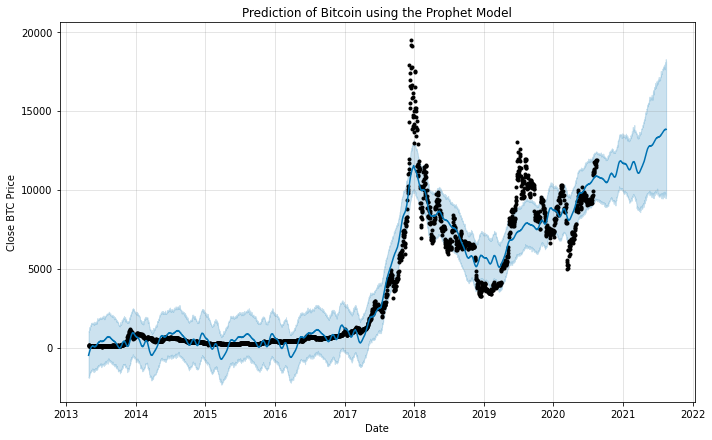

In [68]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of Bitcoin using the Prophet Model")
plt.xlabel("Date")
plt.ylabel("Close BTC Price")
plt.show()

In [59]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-04-28,71.194929,-1947.246111,868.967073,71.194929,71.194929,-556.250952,-556.250952,-556.250952,-243.113256,-243.113256,-243.113256,-8.333917,-8.333917,-8.333917,-304.803779,-304.803779,-304.803779,0.0,0.0,0.0,-485.056023
1,2013-04-29,73.745491,-1859.007681,1039.240024,73.745491,73.745491,-501.317378,-501.317378,-501.317378,-243.113256,-243.113256,-243.113256,8.062909,8.062909,8.062909,-266.267031,-266.267031,-266.267031,0.0,0.0,0.0,-427.571887
2,2013-04-30,76.296052,-1943.703825,1077.069724,76.296052,76.296052,-470.207416,-470.207416,-470.207416,-243.113256,-243.113256,-243.113256,0.082767,0.082767,0.082767,-227.176926,-227.176926,-227.176926,0.0,0.0,0.0,-393.911363
3,2013-05-01,78.846614,-1870.478207,1178.606816,78.846614,78.846614,-429.232362,-429.232362,-429.232362,-243.113256,-243.113256,-243.113256,1.737070,1.737070,1.737070,-187.856176,-187.856176,-187.856176,0.0,0.0,0.0,-350.385748
4,2013-05-02,81.397176,-1756.611206,1188.746748,81.397176,81.397176,-400.648840,-400.648840,-400.648840,-243.113256,-243.113256,-243.113256,-8.883285,-8.883285,-8.883285,-148.652299,-148.652299,-148.652299,0.0,0.0,0.0,-319.251664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,2020-09-30,10907.453714,9039.980867,11932.086575,10845.884076,10965.058885,-406.128398,-406.128398,-406.128398,-243.113256,-243.113256,-243.113256,1.737070,1.737070,1.737070,-164.752212,-164.752212,-164.752212,0.0,0.0,0.0,10501.325317
2713,2020-10-01,10915.594956,9016.961651,11882.222906,10851.164179,10975.640829,-438.176322,-438.176322,-438.176322,-243.113256,-243.113256,-243.113256,-8.883285,-8.883285,-8.883285,-186.179781,-186.179781,-186.179781,0.0,0.0,0.0,10477.418634
2714,2020-10-02,10923.736198,8898.467246,12034.224177,10855.792656,10993.387621,-449.881894,-449.881894,-449.881894,-243.113256,-243.113256,-243.113256,-0.807704,-0.807704,-0.807704,-205.960934,-205.960934,-205.960934,0.0,0.0,0.0,10473.854304
2715,2020-10-03,10931.877440,8966.694200,12045.036247,10860.175187,11008.344866,-458.717098,-458.717098,-458.717098,-243.113256,-243.113256,-243.113256,8.142159,8.142159,8.142159,-223.746001,-223.746001,-223.746001,0.0,0.0,0.0,10473.160342


Level Price
0  13504
0.236 13496.212
0.382 13491.394
0.618 13483.606
1  13471


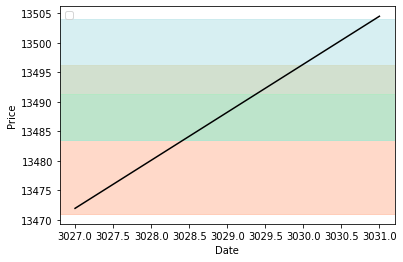

In [71]:
import matplotlib.pyplot as plt

fibs = prediction['trend'].tail()

price_min = fibs.min()
price_max = fibs.max()

price_min = int(price_min)
price_min

price_max = int(price_max)
price_max


diff = price_max - price_min

level1 = price_max - 0.236 * diff
level2 = price_max - 0.382 * diff
level3 = price_max - 0.618 * diff

print("Level", "Price")
print("0 ", price_max)
print("0.236", level1)
print("0.382", level2)
print("0.618", level3)
print("1 ", price_min)



fig, ax = plt.subplots()
ax.plot(prediction['trend'].tail(), color='black')
ax.axhspan(level1, price_min, alpha=0.4, color='lightsalmon')
ax.axhspan(level2, level1, alpha=0.5, color='palegoldenrod')
ax.axhspan(level3, level2, alpha=0.5, color='palegreen')
ax.axhspan(price_max, level3, alpha=0.5, color='powderblue')

plt.ylabel("Price")
plt.xlabel("Date")
plt.legend(loc=2)
plt.show()